In [17]:
import numpy as np
import pandas as pd

In [46]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_curve, f1_score, classification_report
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [19]:
# Read in the Network Measures dataset
nm_df = pd.read_csv("NetworkMeasuresFeatures.csv")

In [20]:
# Renaming columns in readable format to understand what each column represents.
col_names = ['Actor', 'A_Acc',
             'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
             'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
             'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
             'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_ModularityClass', 'PartyPlay_Pagerank',
             'PartyPlay_ComponentId', 'PartyPlay_StrConnId', 'PartyPlay_ClusteringCoefficient', 'PartyPlay_Eigenvector',
             'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
             'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
             'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
             'Friendship_Authority', 'Friendship_Hub', 'Friendship_ModularityClass', 'Friendship_Pagerank',
             'Friendship_ComponentId', 'Friendship_StrConnId', 'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
             'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
             'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
             'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
             'Trade_Authority', 'Trade_Hub', 'Trade_ModularityClass', 'Trade_Pagerank',
             'Trade_ComponentId', 'Trade_StrConnId', 'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
             'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
             'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
             'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
             'Whisper_Authority', 'Whisper_Hub', 'Whisper_ModularityClass', 'Whisper_Pagerank',
             'Whisper_ComponentId', 'Whisper_StrConnId', 'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
             'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
             'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
             'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
             'Mail_Authority', 'Mail_Hub', 'Mail_ModularityClass', 'Mail_Pagerank',
             'Mail_ComponentId', 'Mail_StrConnId', 'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_ModularityClass', 'Shop_Pagerank',
             'Shop_ComponentId', 'Shop_StrConnId', 'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type'
            ]
nm_df.columns = col_names

In [21]:
# Drop the following columns as they don't any explanation about the data. Also the data is not distributed in
# a way that can distinguish the between human and bot players.
cols_to_drop = [
    'PartyPlay_ModularityClass', 'PartyPlay_ComponentId', 'PartyPlay_StrConnId',
    'Friendship_ModularityClass', 'Friendship_ComponentId', 'Friendship_StrConnId',
    'Trade_ModularityClass', 'Trade_ComponentId', 'Trade_StrConnId',
    'Shop_ModularityClass', 'Shop_ComponentId', 'Shop_StrConnId',
    'Whisper_ModularityClass', 'Whisper_ComponentId', 'Whisper_StrConnId',
    'Mail_ModularityClass', 'Mail_ComponentId', 'Mail_StrConnId'
]

In [22]:
nm_df.drop(cols_to_drop, axis=1, inplace=True)

In [23]:
# Change Type as Category
nm_df.Type = nm_df.Type.astype('category')

In [24]:
nm_df.Type.replace({'Human': 0, 'Bot': 1}, inplace=True)

In [25]:
_ = nm_df.Type.astype('int64')

In [26]:
nm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 87 columns):
Actor                               49739 non-null int64
A_Acc                               49739 non-null int64
PartyPlay_InDegree                  49739 non-null int64
PartyPlay_OutDegree                 49739 non-null int64
PartyPlay_Degree                    49739 non-null int64
PartyPlay_WeightedDegree            49739 non-null int64
PartyPlay_WeightedInDegree          49739 non-null int64
PartyPlay_WeightedOutDegree         49739 non-null int64
PartyPlay_Eccentricity              49739 non-null int64
PartyPlay_ClosenessCentrality       49739 non-null float64
PartyPlay_BetweennessCentrality     49739 non-null float64
PartyPlay_Authority                 49739 non-null float64
PartyPlay_Hub                       49739 non-null float64
PartyPlay_Pagerank                  49739 non-null float64
PartyPlay_ClusteringCoefficient     49739 non-null float64
PartyPlay_Eigenvector   

In [28]:
# Creating different datasets based on the Group activity
party_df = nm_df[['Actor', 'A_Acc',
                  'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree',
                  'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
                  'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality',
                  'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_Pagerank',
                  'PartyPlay_ClusteringCoefficient',
                  'PartyPlay_Eigenvector', 'Type']].copy()
friendship_df = nm_df[['Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_Degree',
                       'Friendship_WeightedDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
                       'Friendship_Eccentricity', 'Friendship_ClosenessCentrality', 'Friendship_BetweennessCentrality',
                       'Friendship_Authority', 'Friendship_Hub', 'Friendship_Pagerank',
                       'Friendship_ClusteringCoefficient', 'Friendship_Eigenvector',
                       'Type']].copy()
trade_df = nm_df[[
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_Degree',
    'Trade_WeightedDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_Eccentricity', 'Trade_ClosenessCentrality', 'Trade_BetweennessCentrality',
    'Trade_Authority', 'Trade_Hub', 'Trade_Pagerank',
    'Trade_ClusteringCoefficient', 'Trade_Eigenvector',
    'Type']].copy()
shop_df = nm_df[[
             'Shop_InDegree', 'Shop_OutDegree', 'Shop_Degree',
             'Shop_WeightedDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
             'Shop_Eccentricity', 'Shop_ClosenessCentrality', 'Shop_BetweennessCentrality',
             'Shop_Authority', 'Shop_Hub', 'Shop_Pagerank',
             'Shop_ClusteringCoefficient', 'Shop_Eigenvector',
             'Type']].copy()
whisper_df = nm_df[[
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_Degree',
    'Whisper_WeightedDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_Eccentricity', 'Whisper_ClosenessCentrality', 'Whisper_BetweennessCentrality',
    'Whisper_Authority', 'Whisper_Hub', 'Whisper_Pagerank',
    'Whisper_ClusteringCoefficient', 'Whisper_Eigenvector',
    'Type']].copy()
mail_df = nm_df[[
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_Degree',
    'Mail_WeightedDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_Eccentricity', 'Mail_ClosenessCentrality', 'Mail_BetweennessCentrality',
    'Mail_Authority', 'Mail_Hub', 'Mail_Pagerank',
    'Mail_ClusteringCoefficient', 'Mail_Eigenvector',
    'Type']].copy()


In [29]:
# Getting the list of cols that we want to visulaize in pairplot. This will exclude the Actor and A_Acc cols
cols = party_df.columns.tolist()
cols.remove('Actor'); cols.remove('A_Acc')
print(cols)

['PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree', 'PartyPlay_Eccentricity', 'PartyPlay_ClosenessCentrality', 'PartyPlay_BetweennessCentrality', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_Pagerank', 'PartyPlay_ClusteringCoefficient', 'PartyPlay_Eigenvector', 'Type']


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_met

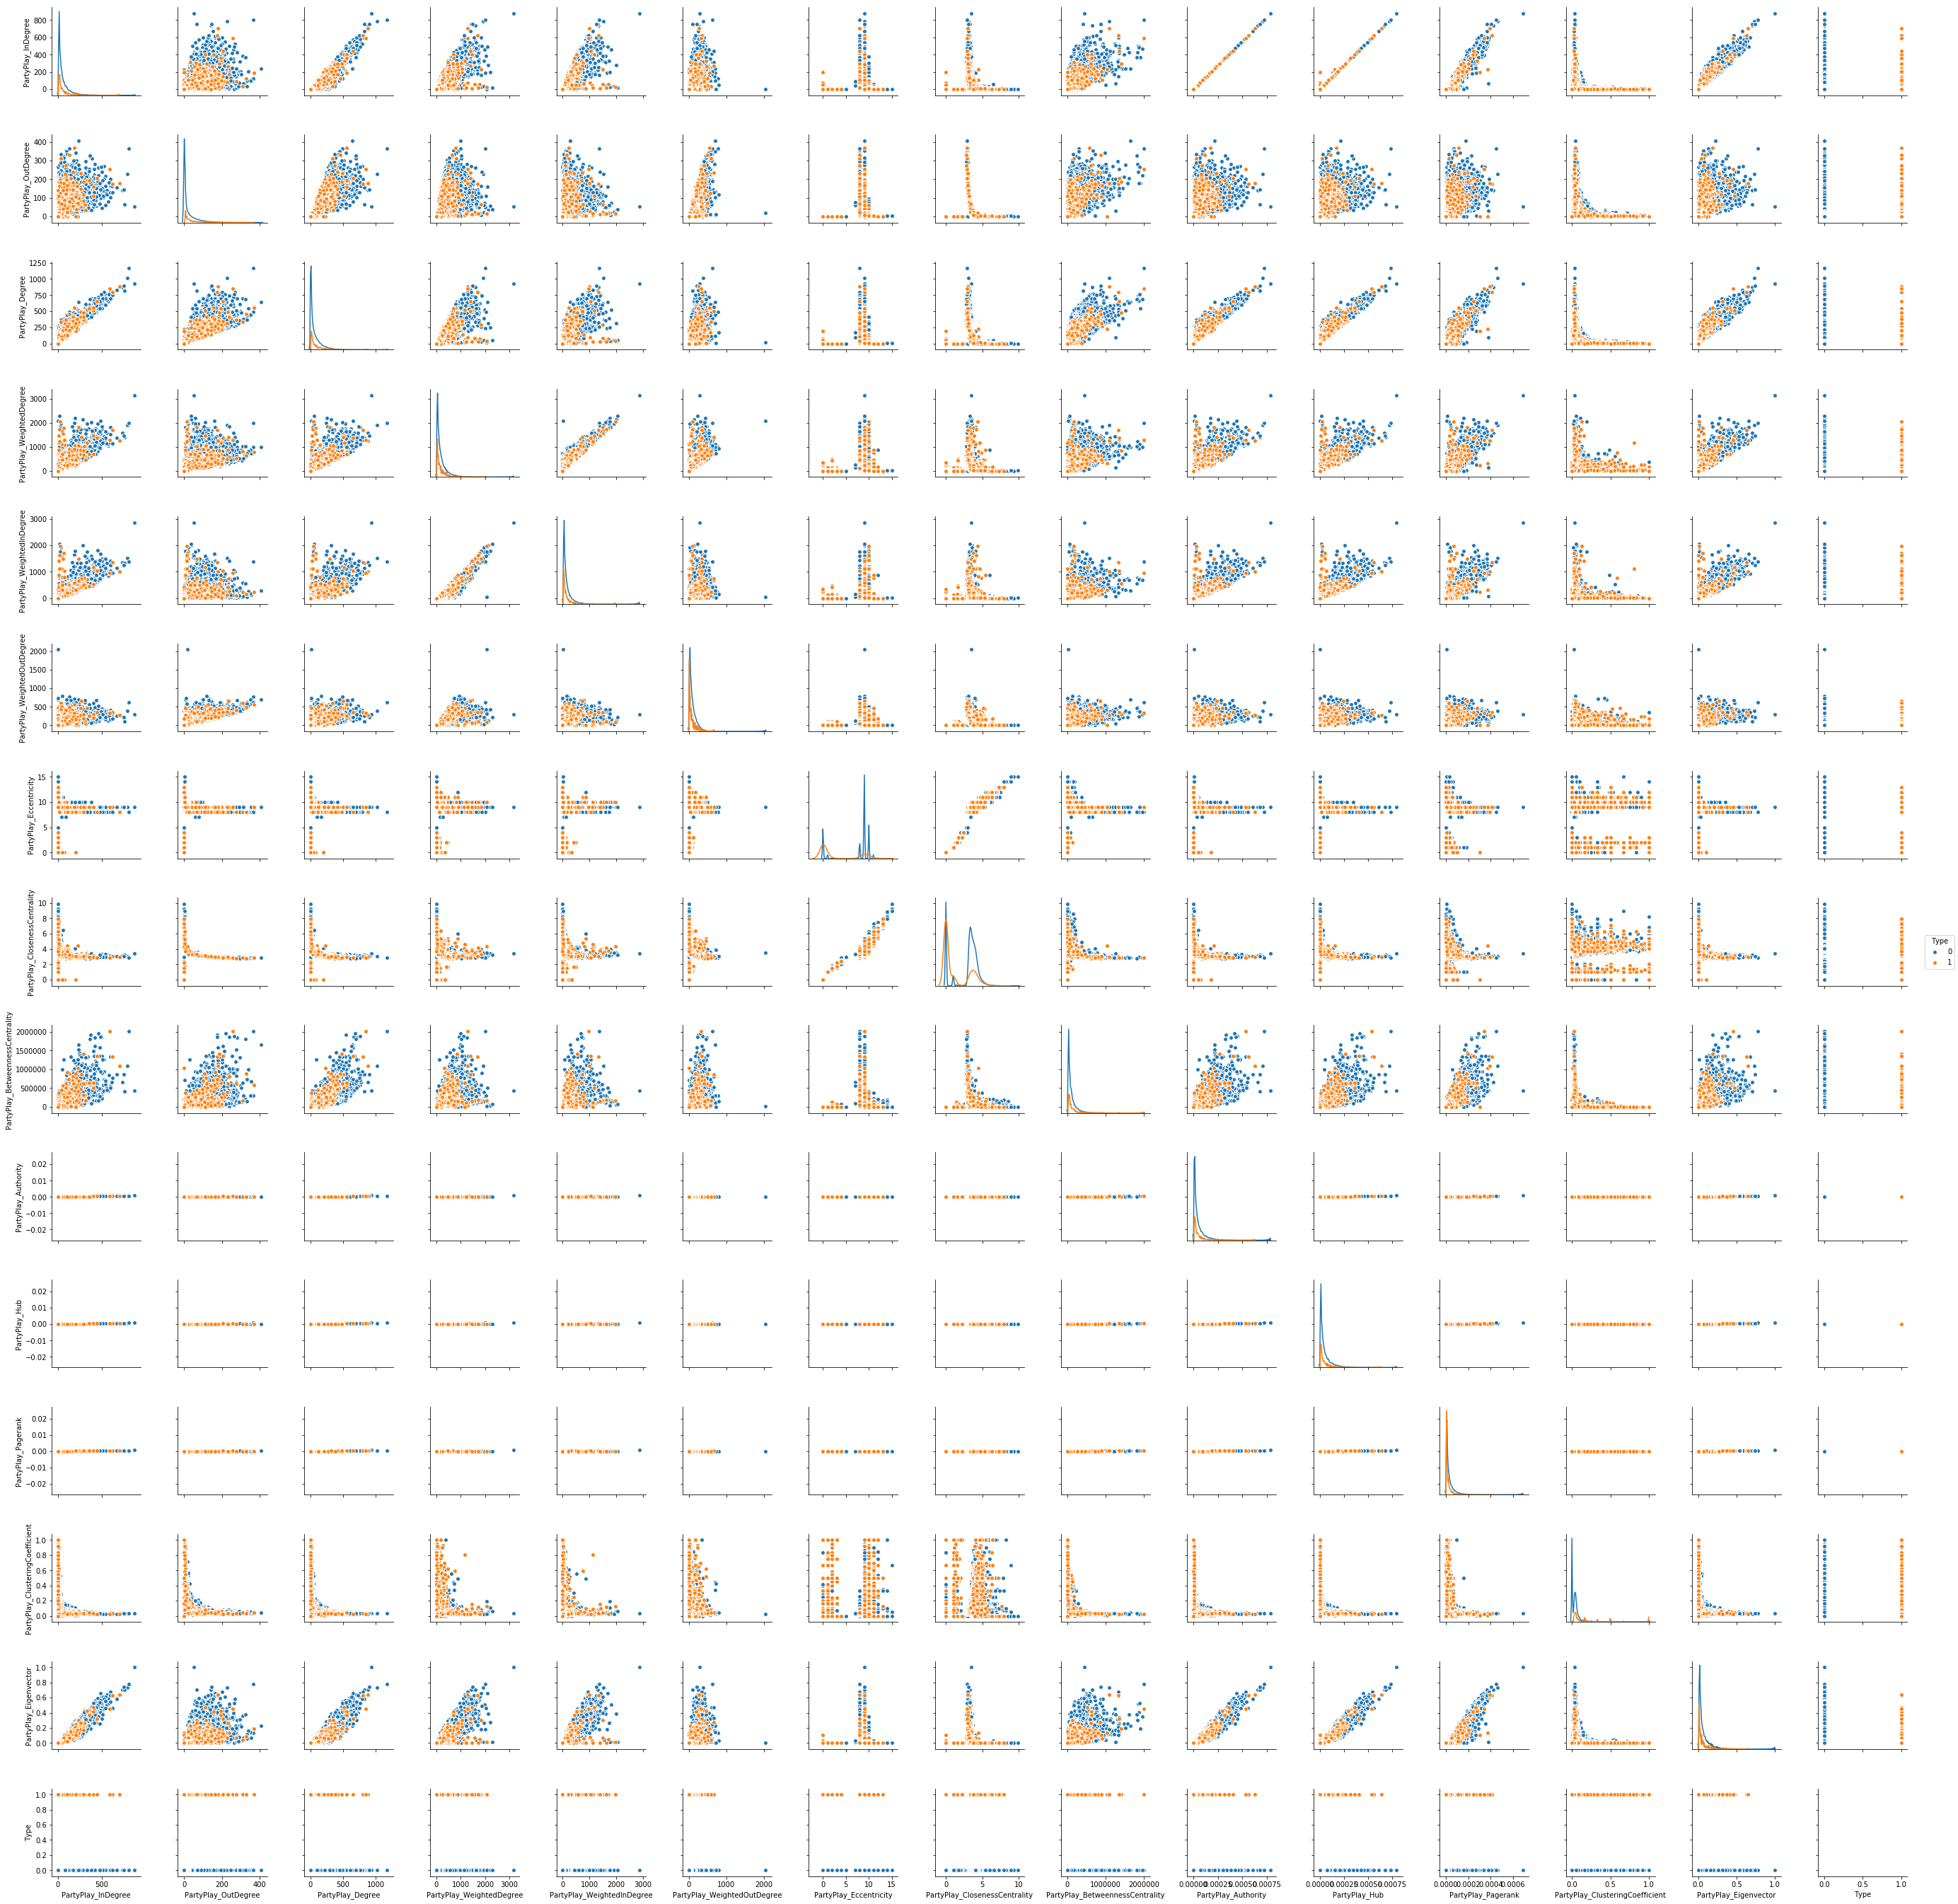

In [30]:
# Visualizing the pairplot distribution
sns.pairplot(party_df[cols], hue='Type', diag_kind='kde')

In [31]:
# 1. Most of the features have distributions with long tail.
# 2. Closeness centrality and Eccentricity seems to have linear relationship between each other.
# 3. The distributions of Closeness centrality and Eccentricity shows two different clusters. In both of the clusters,
# its clear that for higher valued cluster, the density of human players is more compared to bot players.
# 4. There is linear relationship between PartyPlay_WeightedDegree and PartyPlay_WeightedInDegree.
# 5. There is linear relationship between PartyPlay_Degree with PartyPlay_Authority, PartyPlay_Hub.
# 6. For PartyPlay_ComponentId, there is clear distinction in the distribution of values, where the distributions of 
# bot player is higher.
# 7. For PartyPlay_StrConnId, there seems to be three clusters. In the lowest cluster, the bot player values are little
# high. For the higher valued clusters, there are more human players.

In [32]:
# Seeing the correlation matrix
party_df[cols].corr()

,PartyPlay_InDegree,PartyPlay_OutDegree,PartyPlay_Degree,PartyPlay_WeightedDegree,PartyPlay_WeightedInDegree,PartyPlay_WeightedOutDegree,PartyPlay_Eccentricity,PartyPlay_ClosenessCentrality,PartyPlay_BetweennessCentrality,PartyPlay_Authority,PartyPlay_Hub,PartyPlay_Pagerank,PartyPlay_ClusteringCoefficient,PartyPlay_Eigenvector,Type
PartyPlay_InDegree,1.000000,0.661925,0.938424,0.877872,0.889119,0.644689,0.216991,0.126276,0.777862,0.999961,0.999506,0.959927,-0.048126,0.956524,-0.122705
PartyPlay_OutDegree,0.661925,1.000000,0.880132,0.747967,0.539441,0.876678,0.299405,0.172964,0.673571,0.663661,0.664548,0.654565,-0.035004,0.646297,-0.164820
PartyPlay_Degree,0.938424,0.880132,1.000000,0.900734,0.811745,0.812375,0.275427,0.159696,0.803104,0.939200,0.939320,0.909652,-0.046614,0.903686,-0.153681
PartyPlay_WeightedDegree,0.877872,0.747967,0.900734,1.000000,0.936164,0.849427,0.257088,0.153371,0.699428,0.878545,0.879209,0.869085,-0.014199,0.874681,-0.127087
PartyPlay_WeightedInDegree,0.889119,0.539441,0.811745,0.936164,1.000000,0.609680,0.192676,0.114581,0.650727,0.889030,0.889078,0.869926,-0.027832,0.875338,-0.096264
PartyPlay_WeightedOutDegree,0.644689,0.876678,0.812375,0.849427,0.609680,1.000000,0.290428,0.173807,0.600195,0.646338,0.647765,0.653685,0.009763,0.658179,-0.142040
PartyPlay_Eccentricity,0.216991,0.299405,0.275427,0.257088,0.192676,0.290428,1.000000,0.975258,0.191588,0.221493,0.225037,0.264578,0.248391,0.185516,-0.391885
PartyPlay_ClosenessCentrality,0.126276,0.172964,0.159696,0.153371,0.114581,0.173807,0.975258,1.000000,0.119328,0.130426,0.134302,0.181499,0.258409,0.098347,-0.371373
PartyPlay_BetweennessCentrality,0.777862,0.673571,0.803104,0.699428,0.650727,0.600195,0.191588,0.119328,1.000000,0.778189,0.775113,0.817691,-0.056969,0.667716,-0.103018
PartyPlay_Authority,0.999961,0.663661,0.939200,0.878545,0.889030,0.646338,0.221493,0.130426,0.778189,1.000000,0.999470,0.960704,-0.046443,0.956150,-0.124993


In [33]:
# From the above correlation matrix, it seems that there are lot of weak predictors from the list of features. Most
# of the features are correlated to the target column with correlated value in the range of 0.1 to 0.2. There is no
# one strong predictor that stands out.

In [48]:
cols_to_take = [
    'Actor', 'A_Acc',         
    'PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
    'PartyPlay_ClusteringCoefficient',
    'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
    'Friendship_ClusteringCoefficient',
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_ClusteringCoefficient',
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_ClusteringCoefficient',
    'Shop_InDegree', 'Shop_OutDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
    'Shop_ClusteringCoefficient', 
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_ClusteringCoefficient',
    'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 
    'Friendship_Degree', 'Friendship_WeightedDegree', 
    'Trade_Degree', 'Trade_WeightedDegree', 
    'Shop_Degree', 'Shop_WeightedDegree', 
    'Mail_Degree', 'Mail_WeightedDegree', 
    'Type']

In [61]:
nm_df_processed = nm_df[cols_to_take]

In [62]:
cols_to_zscore = {
    'party_play': ['PartyPlay_BetweennessCentrality', 'PartyPlay_ClosenessCentrality', 
    'PartyPlay_Eigenvector', 'PartyPlay_Eccentricity', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_Pagerank'],
    'friendship': ['Friendship_BetweennessCentrality', 'Friendship_ClosenessCentrality', 
    'Friendship_Eigenvector', 'Friendship_Eccentricity', 'Friendship_Authority', 'Friendship_Hub', 'Friendship_Pagerank'],
    'trade': ['Trade_BetweennessCentrality',  'Trade_ClosenessCentrality',
    'Trade_Eigenvector', 'Trade_Eccentricity', 'Trade_Authority', 'Trade_Hub', 'Trade_Pagerank'],
    'shop': ['Shop_BetweennessCentrality', 'Shop_ClosenessCentrality',
    'Shop_Eigenvector', 'Shop_Eccentricity', 'Shop_Authority', 'Shop_Hub', 'Shop_Pagerank'],
    'mail': ['Mail_BetweennessCentrality', 'Mail_ClosenessCentrality', 
    'Mail_Eigenvector', 'Mail_Eccentricity', 'Mail_Authority', 'Mail_Hub', 'Mail_Pagerank'],
    'whisper': ['Whisper_BetweennessCentrality', 'Whisper_ClosenessCentrality', 
    'Whisper_Eigenvector', 'Whisper_Eccentricity', 'Whisper_Authority', 'Whisper_Hub', 'Whisper_Pagerank']
}

In [63]:
grp_act_df = {
    'party_play': party_df,
    'friendship': friendship_df,
    'trade': trade_df,
    'shop': shop_df,
    'mail': mail_df,
    'whisper': whisper_df
}

In [64]:
# For each act_df, apply zscore to the cols listed in cols_to_zscore
for act_name, act_df in grp_act_df.items():
    act_cols_to_zscore = cols_to_zscore.get(act_name)
    act_df[act_cols_to_zscore] = act_df[act_cols_to_zscore].apply(zscore)

In [66]:
# We will cluster each of the cols in cols_to_zscore and assign a cluster number to each, replacing its original value
# by its cluster number. This is to make the model better as it will then the model will not have to get build
# on scatter values, but on values which represents its cluster, which are very less in number. We do this for
# every such feature in cols_to_zscore on not just on the all the features taken as whole.
k_means_cluster_num = 3

In [68]:
# For each feature, get predicted cluster. Put the resultant cluster value of the feature against new nm_df dataframe
for act_name, act_df in grp_act_df.items():
    act_cols = cols_to_zscore.get(act_name)
    for act_col in act_cols:
        tmp_df = pd.DataFrame({act_col: act_df[act_col].copy()})
        clusters = KMeans(n_clusters=k_means_cluster_num, random_state=7, n_init=10)
        clusters.fit(tmp_df)
        predicted_clusters_array = clusters.predict(tmp_df)
        nm_df_processed[act_col] = predicted_clusters_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [70]:
X_cols = ['PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
    'PartyPlay_ClusteringCoefficient',
    'Friendship_InDegree', 'Friendship_OutDegree', 'Friendship_WeightedInDegree', 'Friendship_WeightedOutDegree',
    'Friendship_ClusteringCoefficient',
    'Trade_InDegree', 'Trade_OutDegree', 'Trade_WeightedInDegree', 'Trade_WeightedOutDegree',
    'Trade_ClusteringCoefficient',
    'Mail_InDegree', 'Mail_OutDegree', 'Mail_WeightedInDegree', 'Mail_WeightedOutDegree',
    'Mail_ClusteringCoefficient',
    'Shop_InDegree', 'Shop_OutDegree', 'Shop_WeightedInDegree', 'Shop_WeightedOutDegree',
    'Shop_ClusteringCoefficient', 
    'Whisper_InDegree', 'Whisper_OutDegree', 'Whisper_WeightedInDegree', 'Whisper_WeightedOutDegree',
    'Whisper_ClusteringCoefficient',
    'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 'PartyPlay_BetweennessCentrality', 'PartyPlay_ClosenessCentrality', 
    'PartyPlay_Eigenvector', 'PartyPlay_Eccentricity', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_Pagerank',
    'Friendship_Degree', 'Friendship_WeightedDegree', 'Friendship_BetweennessCentrality', 'Friendship_ClosenessCentrality', 
    'Friendship_Eigenvector', 'Friendship_Eccentricity', 'Friendship_Authority', 'Friendship_Hub', 'Friendship_Pagerank',
    'Trade_Degree', 'Trade_WeightedDegree', 'Trade_BetweennessCentrality',  'Trade_ClosenessCentrality',
    'Trade_Eigenvector', 'Trade_Eccentricity', 'Trade_Authority', 'Trade_Hub', 'Trade_Pagerank',
    'Shop_Degree', 'Shop_WeightedDegree', 'Shop_BetweennessCentrality', 'Shop_ClosenessCentrality',
    'Shop_Eigenvector', 'Shop_Eccentricity', 'Shop_Authority', 'Shop_Hub', 'Shop_Pagerank',
    'Mail_Degree', 'Mail_WeightedDegree', 'Mail_BetweennessCentrality', 'Mail_ClosenessCentrality', 
    'Mail_Eigenvector', 'Mail_Eccentricity', 'Mail_Authority', 'Mail_Hub', 'Mail_Pagerank']
#X_cols = ['PartyPlay_InDegree', 'PartyPlay_OutDegree', 'PartyPlay_WeightedInDegree', 'PartyPlay_WeightedOutDegree',
#    'PartyPlay_ClusteringCoefficient', 'PartyPlay_Degree', 'PartyPlay_WeightedDegree', 'PartyPlay_BetweennessCentrality', 'PartyPlay_ClosenessCentrality', 
#    'PartyPlay_Eigenvector', 'PartyPlay_Eccentricity', 'PartyPlay_Authority', 'PartyPlay_Hub', 'PartyPlay_Pagerank']
y_col = ['Type']
X = nm_df_processed[X_cols]
y = nm_df_processed[y_col]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [73]:
# Get all the models in a list
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Tree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVC", SVC()))

In [74]:
for model_name, model in models:
    print("Running model %s" % model_name)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("Model Score %s " % score)
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, y_predict))
    print("Overall precision of %s: %s" % (model_name, precision_score(y_test, y_predict)))
    print("Overall recall of %s: %s" % (model_name, recall_score(y_test, y_predict)))
    print("Overall F1 Score of %s: %s" % (model_name, f1_score(y_test, y_predict)))
    print("Classification Report: ")
    print(classification_report(y_test, y_predict, [0, 1]))
    print("----------------------------------------------------- \n\n")

Running model LR


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score 0.8520305589063129 
Confusion Matrix: 
[[12621    51]
 [ 2157    93]]
Overall precision of LR: 0.6458333333333334
Overall recall of LR: 0.04133333333333333
Overall F1 Score of LR: 0.07769423558897243
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12672
           1       0.65      0.04      0.08      2250

   micro avg       0.85      0.85      0.85     14922
   macro avg       0.75      0.52      0.50     14922
weighted avg       0.82      0.85      0.79     14922

----------------------------------------------------- 


Running model LDA


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Model Score 0.8831926015279453 
Confusion Matrix: 
[[12339   333]
 [ 1410   840]]
Overall precision of LDA: 0.7161125319693095
Overall recall of LDA: 0.37333333333333335
Overall F1 Score of LDA: 0.49079754601226994
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12672
           1       0.72      0.37      0.49      2250

   micro avg       0.88      0.88      0.88     14922
   macro avg       0.81      0.67      0.71     14922
weighted avg       0.87      0.88      0.87     14922

----------------------------------------------------- 


Running model KNN
Model Score 0.9006835544833133 
Confusion Matrix: 
[[12220   452]
 [ 1030  1220]]
Overall precision of KNN: 0.7296650717703349
Overall recall of KNN: 0.5422222222222223
Overall F1 Score of KNN: 0.6221315655277919
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12672
           1 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model Score 0.8962605548854041 
Confusion Matrix: 
[[12510   162]
 [ 1386   864]]
Overall precision of SVC: 0.8421052631578947
Overall recall of SVC: 0.384
Overall F1 Score of SVC: 0.5274725274725276
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12672
           1       0.84      0.38      0.53      2250

   micro avg       0.90      0.90      0.90     14922
   macro avg       0.87      0.69      0.73     14922
weighted avg       0.89      0.90      0.88     14922

----------------------------------------------------- 


